# Import packages

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 15.7 MB/s eta 0:00:00a 0:00:01


In [ ]:
from ultralytics import YOLO
import cv2
import torch
import numpy as np
import os
from google.colab.patches import cv2_imshow
import pandas as pd
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# See the data

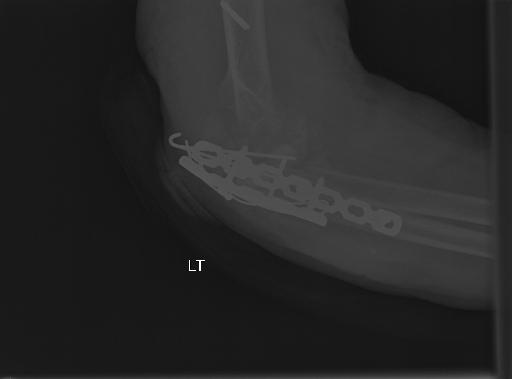

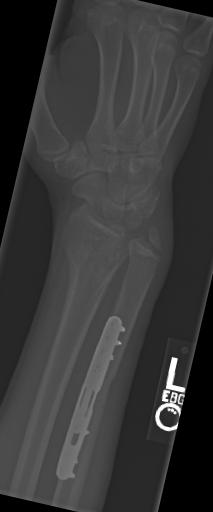

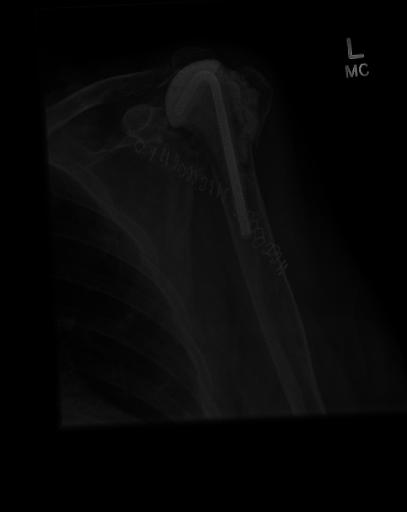

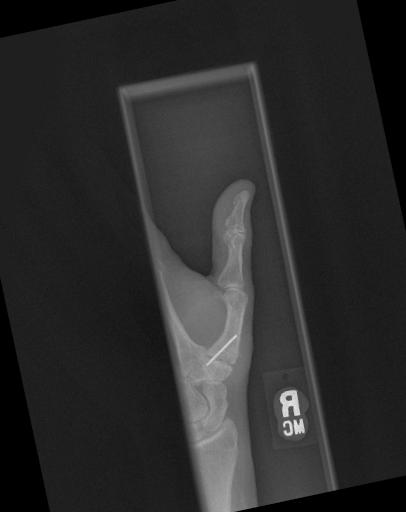

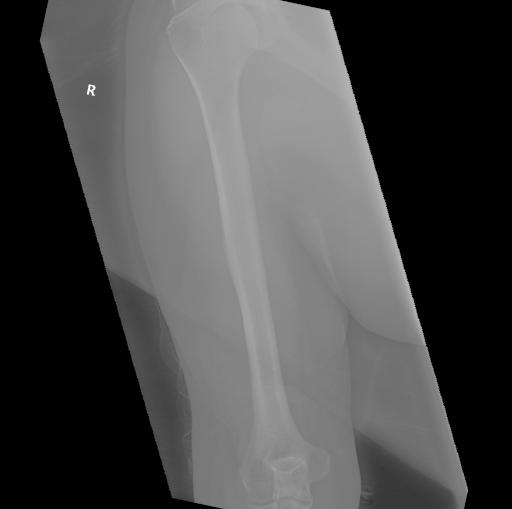

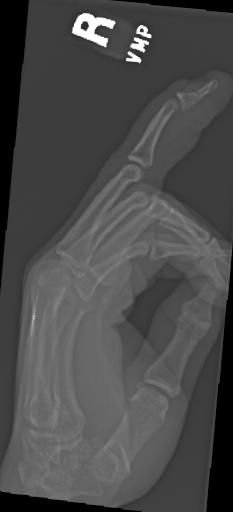

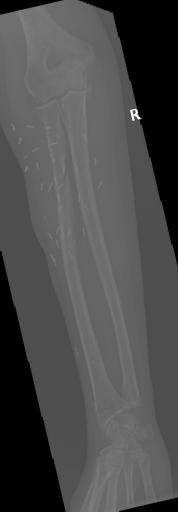

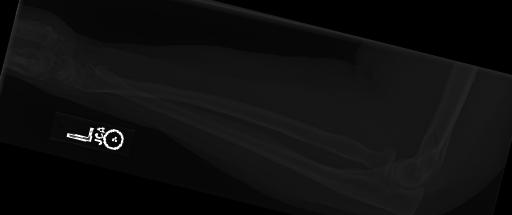

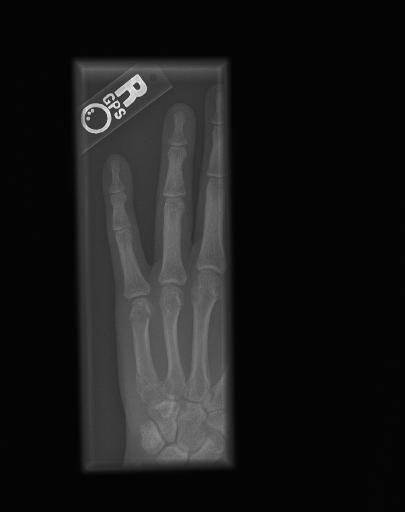

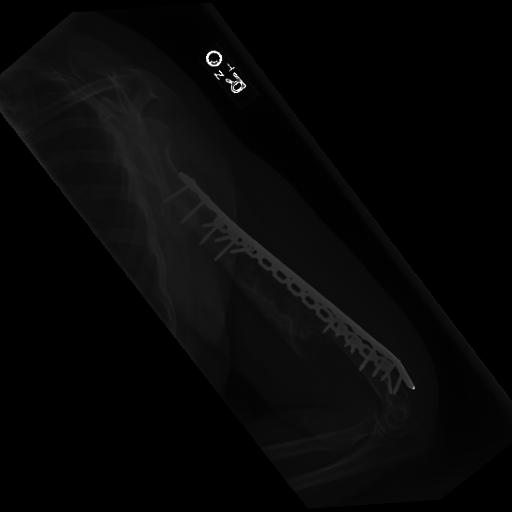

In [ ]:
imgs_dir= "/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/train/images"

for file in os.listdir(imgs_dir)[:10]:
    img_path= os.path.join(imgs_dir, file)
    img= cv2.imread(img_path)

    cv2_imshow(img)

# Train yolo v8

In [ ]:

!yolo task= detect mode= 'train' model= yolov8s.pt data= '/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/data.yaml' epochs= 30 imgsz= 640 batch= 32


Ultralytics 8.3.112 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/data.yaml, epochs=30, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False

## Plot train results

In [ ]:
# get the results csv
results_csv= pd.read_csv("/kaggle/working/runs/detect/train3/results.csv")

In [ ]:
results_csv.head()

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   57.918         2.76467         8.59057         2.39813   
1      2  120.050         2.43615         3.76639         2.15806   
2      3  184.478         2.40825         3.52464         2.20652   
3      4  248.715         2.39131         3.39738         2.16859   
4      5  312.377         2.31196         3.23008         2.12494   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.68445            0.01736           0.01897   
1               0.11357            0.03346           0.05656   
2               0.12212            0.10090           0.08216   
3               0.66309            0.06913           0.05120   
4               0.21470            0.13232           0.11875   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.00458       2.70229       4.46973       2.39033  0.000300   
1              0.01866       2.39071       3.78448       2.29698  0.000583   
2              0.02932       2.43444       3.76077       2.43904  0.000847   
3              0.01663       2.60431       4.15221       2.34195  0.000819   
4              0.03763       2.38004       3.15877       2.25159  0.000789   

     lr/pg1    lr/pg2  
0  0.000300  0.000300  
1  0.000583  0.000583  
2  0.000847  0.000847  
3  0.000819  0.000819  
4  0.000789  0.000789

In [ ]:
results_csv.columns

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

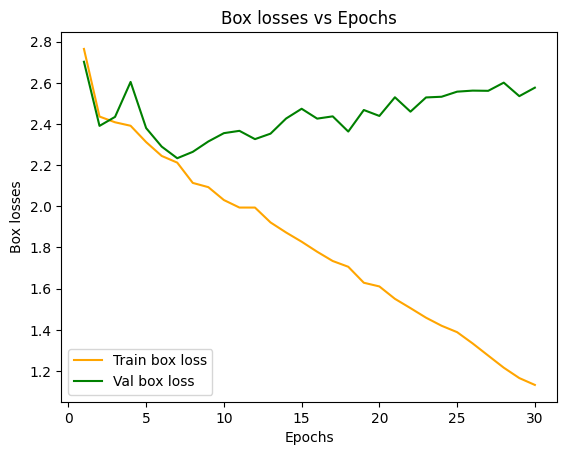

In [ ]:
# plot box loss
plt.plot(range(1, 31), results_csv["train/box_loss"], color= "orange", label= "Train box loss")
plt.plot(range(1, 31), results_csv["val/box_loss"], color= "green", label= "Val box loss")
plt.xlabel("Epochs")
plt.ylabel("Box losses")
plt.title("Box losses vs Epochs")
plt.legend();

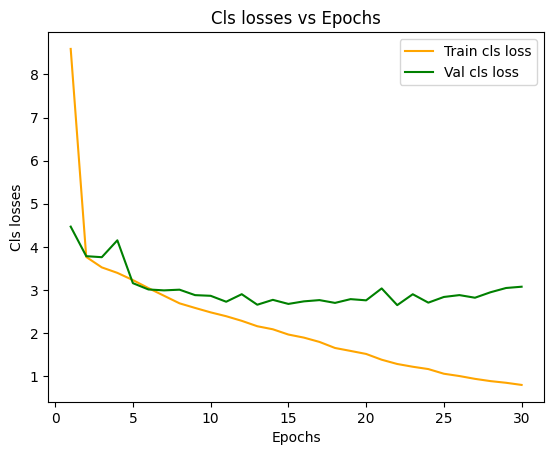

In [ ]:
# plot cls loss
plt.plot(range(1, 31), results_csv["train/cls_loss"], color= "orange", label= "Train cls loss")
plt.plot(range(1, 31), results_csv["val/cls_loss"], color= "green", label= "Val cls loss")
plt.xlabel("Epochs")
plt.ylabel("Cls losses")
plt.title("Cls losses vs Epochs")
plt.legend();

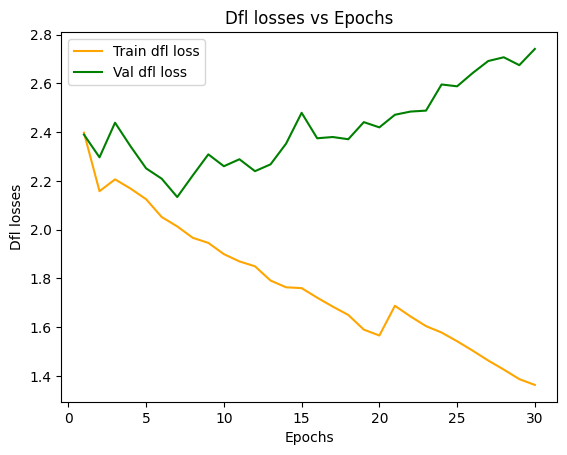

In [ ]:
# plot dfl loss
plt.plot(range(1, 31), results_csv["train/dfl_loss"], color= "orange", label= "Train dfl loss")
plt.plot(range(1, 31), results_csv["val/dfl_loss"], color= "green", label= "Val dfl loss")
plt.xlabel("Epochs")
plt.ylabel("Dfl losses")
plt.title("Dfl losses vs Epochs")
plt.legend();

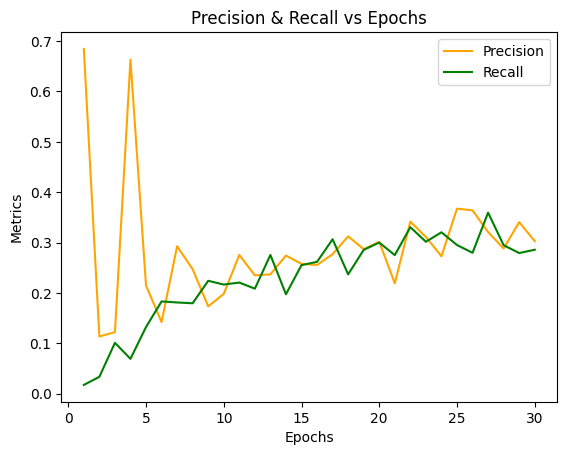

In [ ]:
# plot prec. and recall (B)

plt.plot(range(1, 31), results_csv["metrics/precision(B)"], color= "orange", label= "Precision")
plt.plot(range(1, 31), results_csv["metrics/recall(B)"], color= "green", label= "Recall")
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.title("Precision & Recall vs Epochs")
plt.legend();

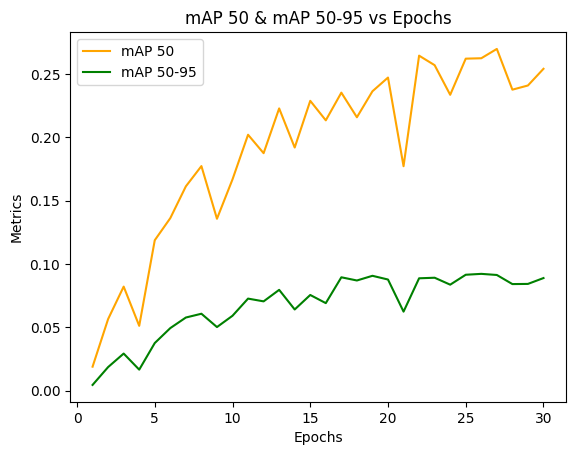

In [ ]:
# plot map 50 and map 50-95

plt.plot(range(1, 31), results_csv["metrics/mAP50(B)"], color= "orange", label= "mAP 50")
plt.plot(range(1, 31), results_csv["metrics/mAP50-95(B)"], color= "green", label= "mAP 50-95")
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.title("mAP 50 & mAP 50-95 vs Epochs")
plt.legend();

# Validation

In [ ]:
# cli
!yolo detect mode= val model= /kaggle/working/runs/detect/train3/weights/best.pt data= /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/data.yaml

Ultralytics 8.3.112 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 1.9±0.4 ms, read: 13.4±6.3 MB/s, size: 12.2 KB)
val: Scanning /kaggle/input/bone-fracture-detection-computer-vision-project/Bone
WARNING ⚠️ val: Cache directory /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        348        204      0.388      0.278      0.263     0.0931
        elbow positive         28         29      0.185      0.138     0.0531     0.0154
      fingers positive         41         48       0.36      0.292      0.235     0.0728
      forearm fracture         37         43      0.651      0.391      0.471       0.21
               humerus         31         36      0.833      0.611      0.665      0

## See the validation results

In [ ]:
os.listdir("/kaggle/working/runs/detect/val")

['P_curve.png',
 'R_curve.png',
 'val_batch0_labels.jpg',
 'confusion_matrix_normalized.png',
 'PR_curve.png',
 'val_batch1_pred.jpg',
 'val_batch2_pred.jpg',
 'confusion_matrix.png',
 'val_batch1_labels.jpg',
 'F1_curve.png',
 'val_batch2_labels.jpg',
 'val_batch0_pred.jpg']

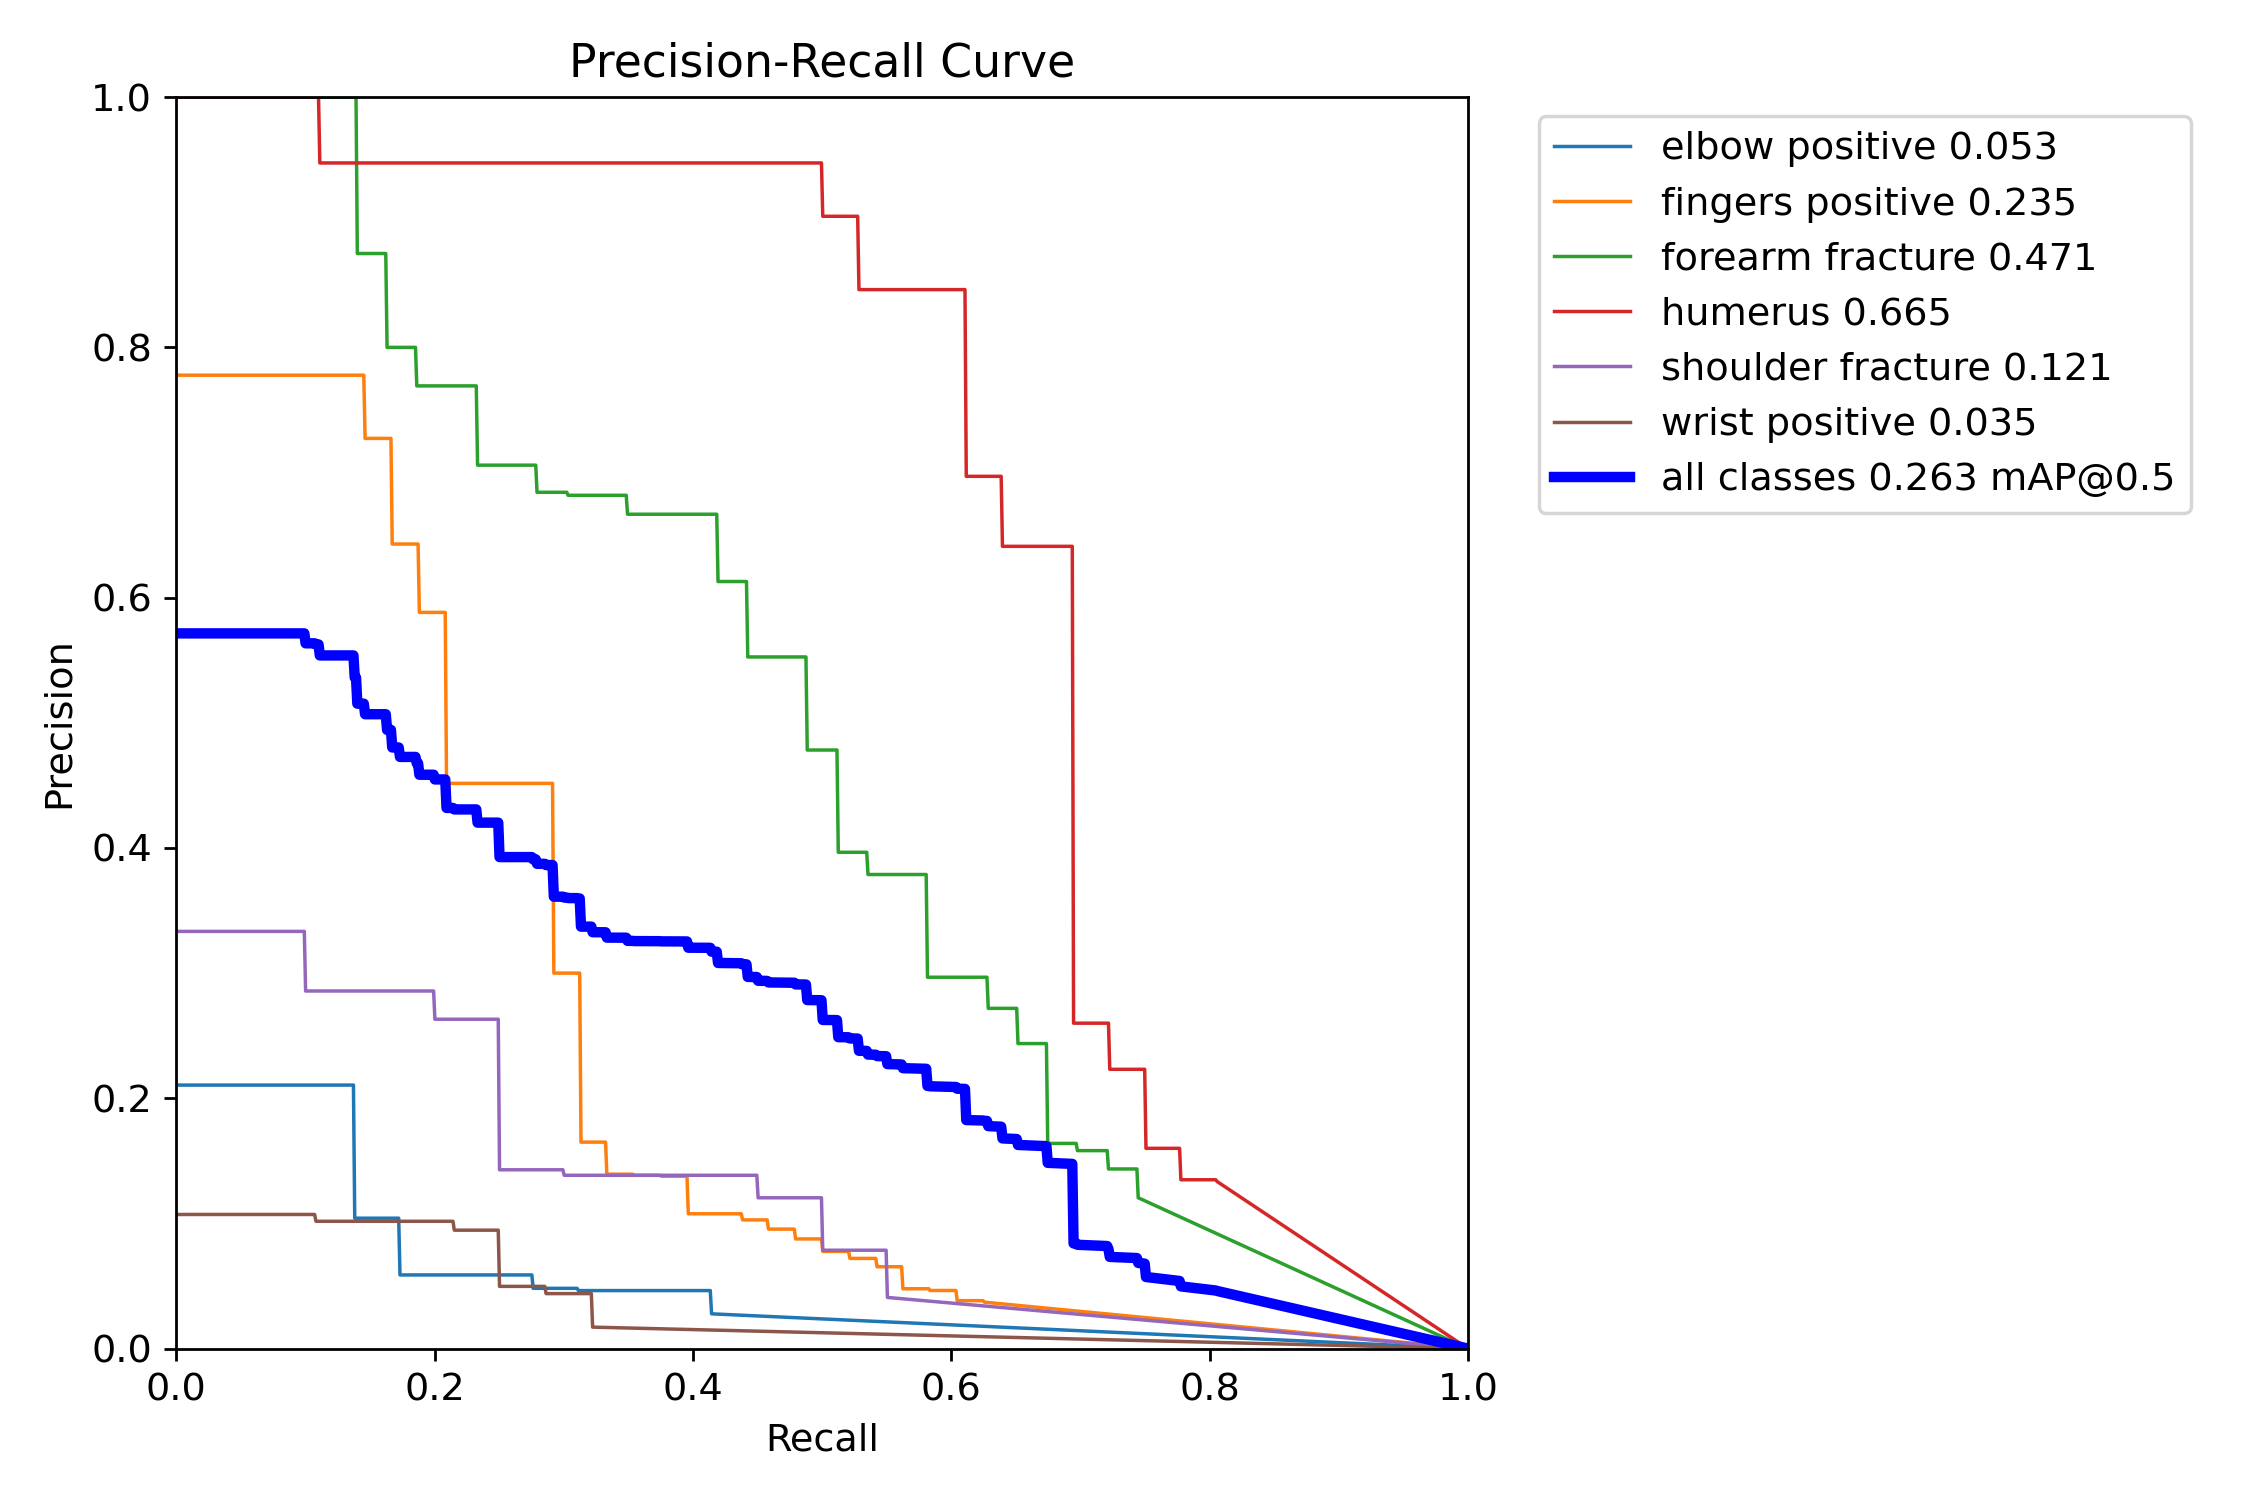

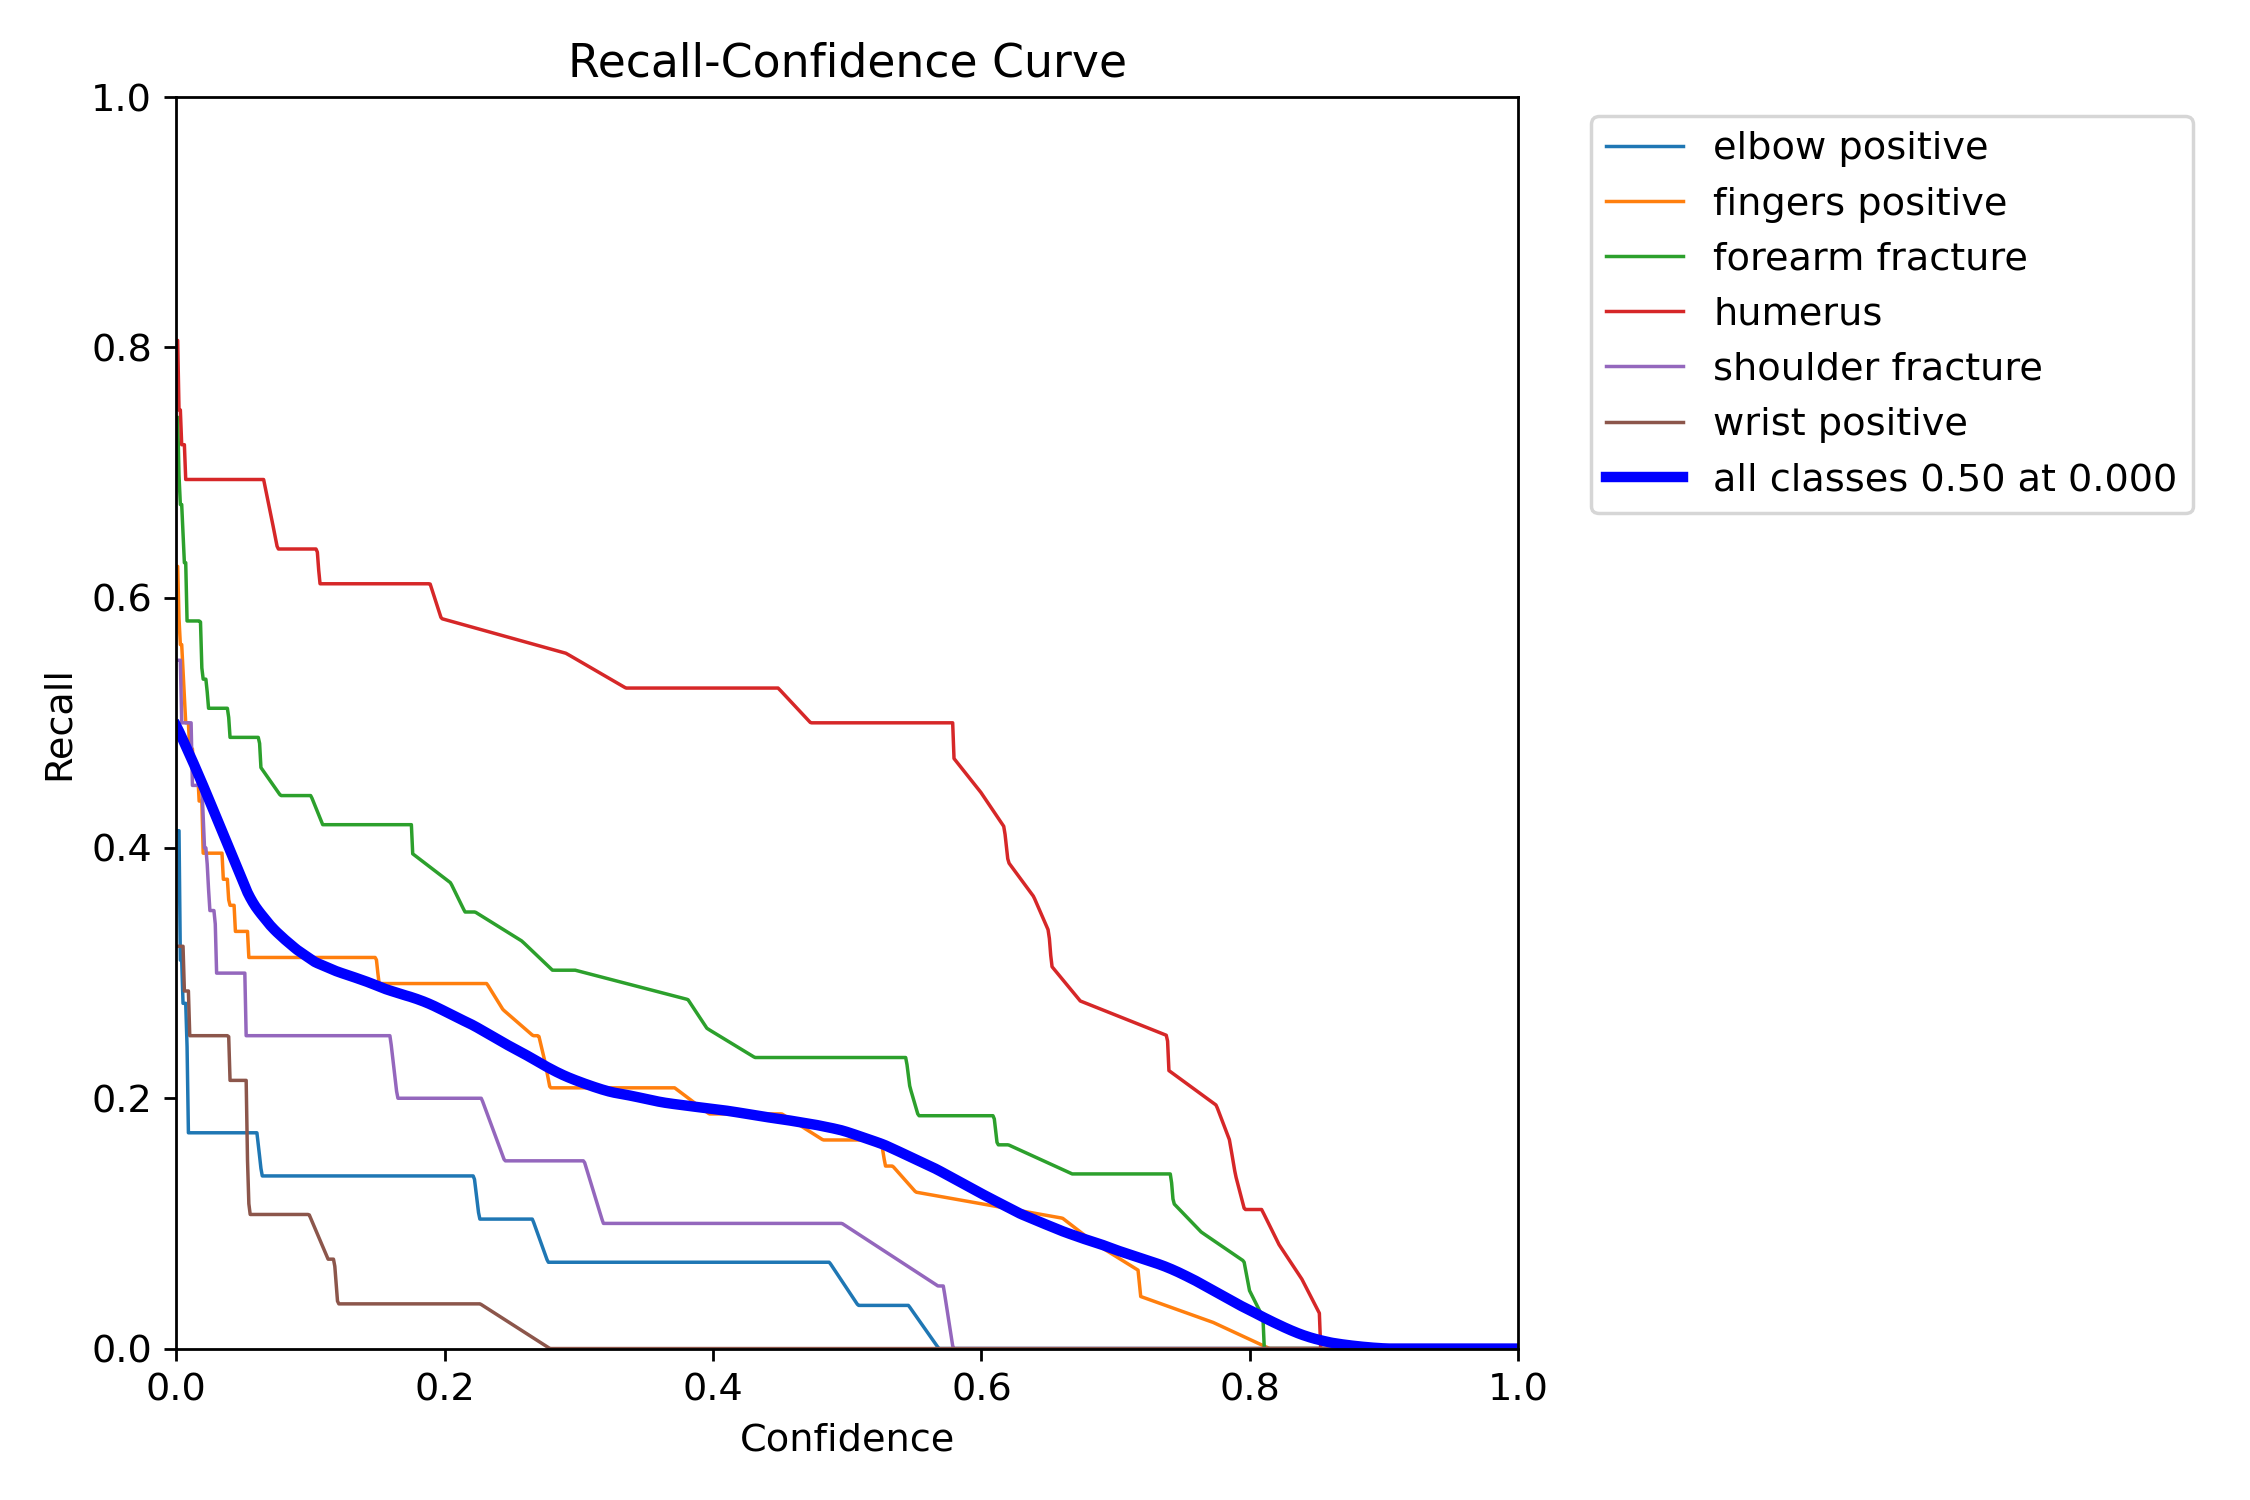

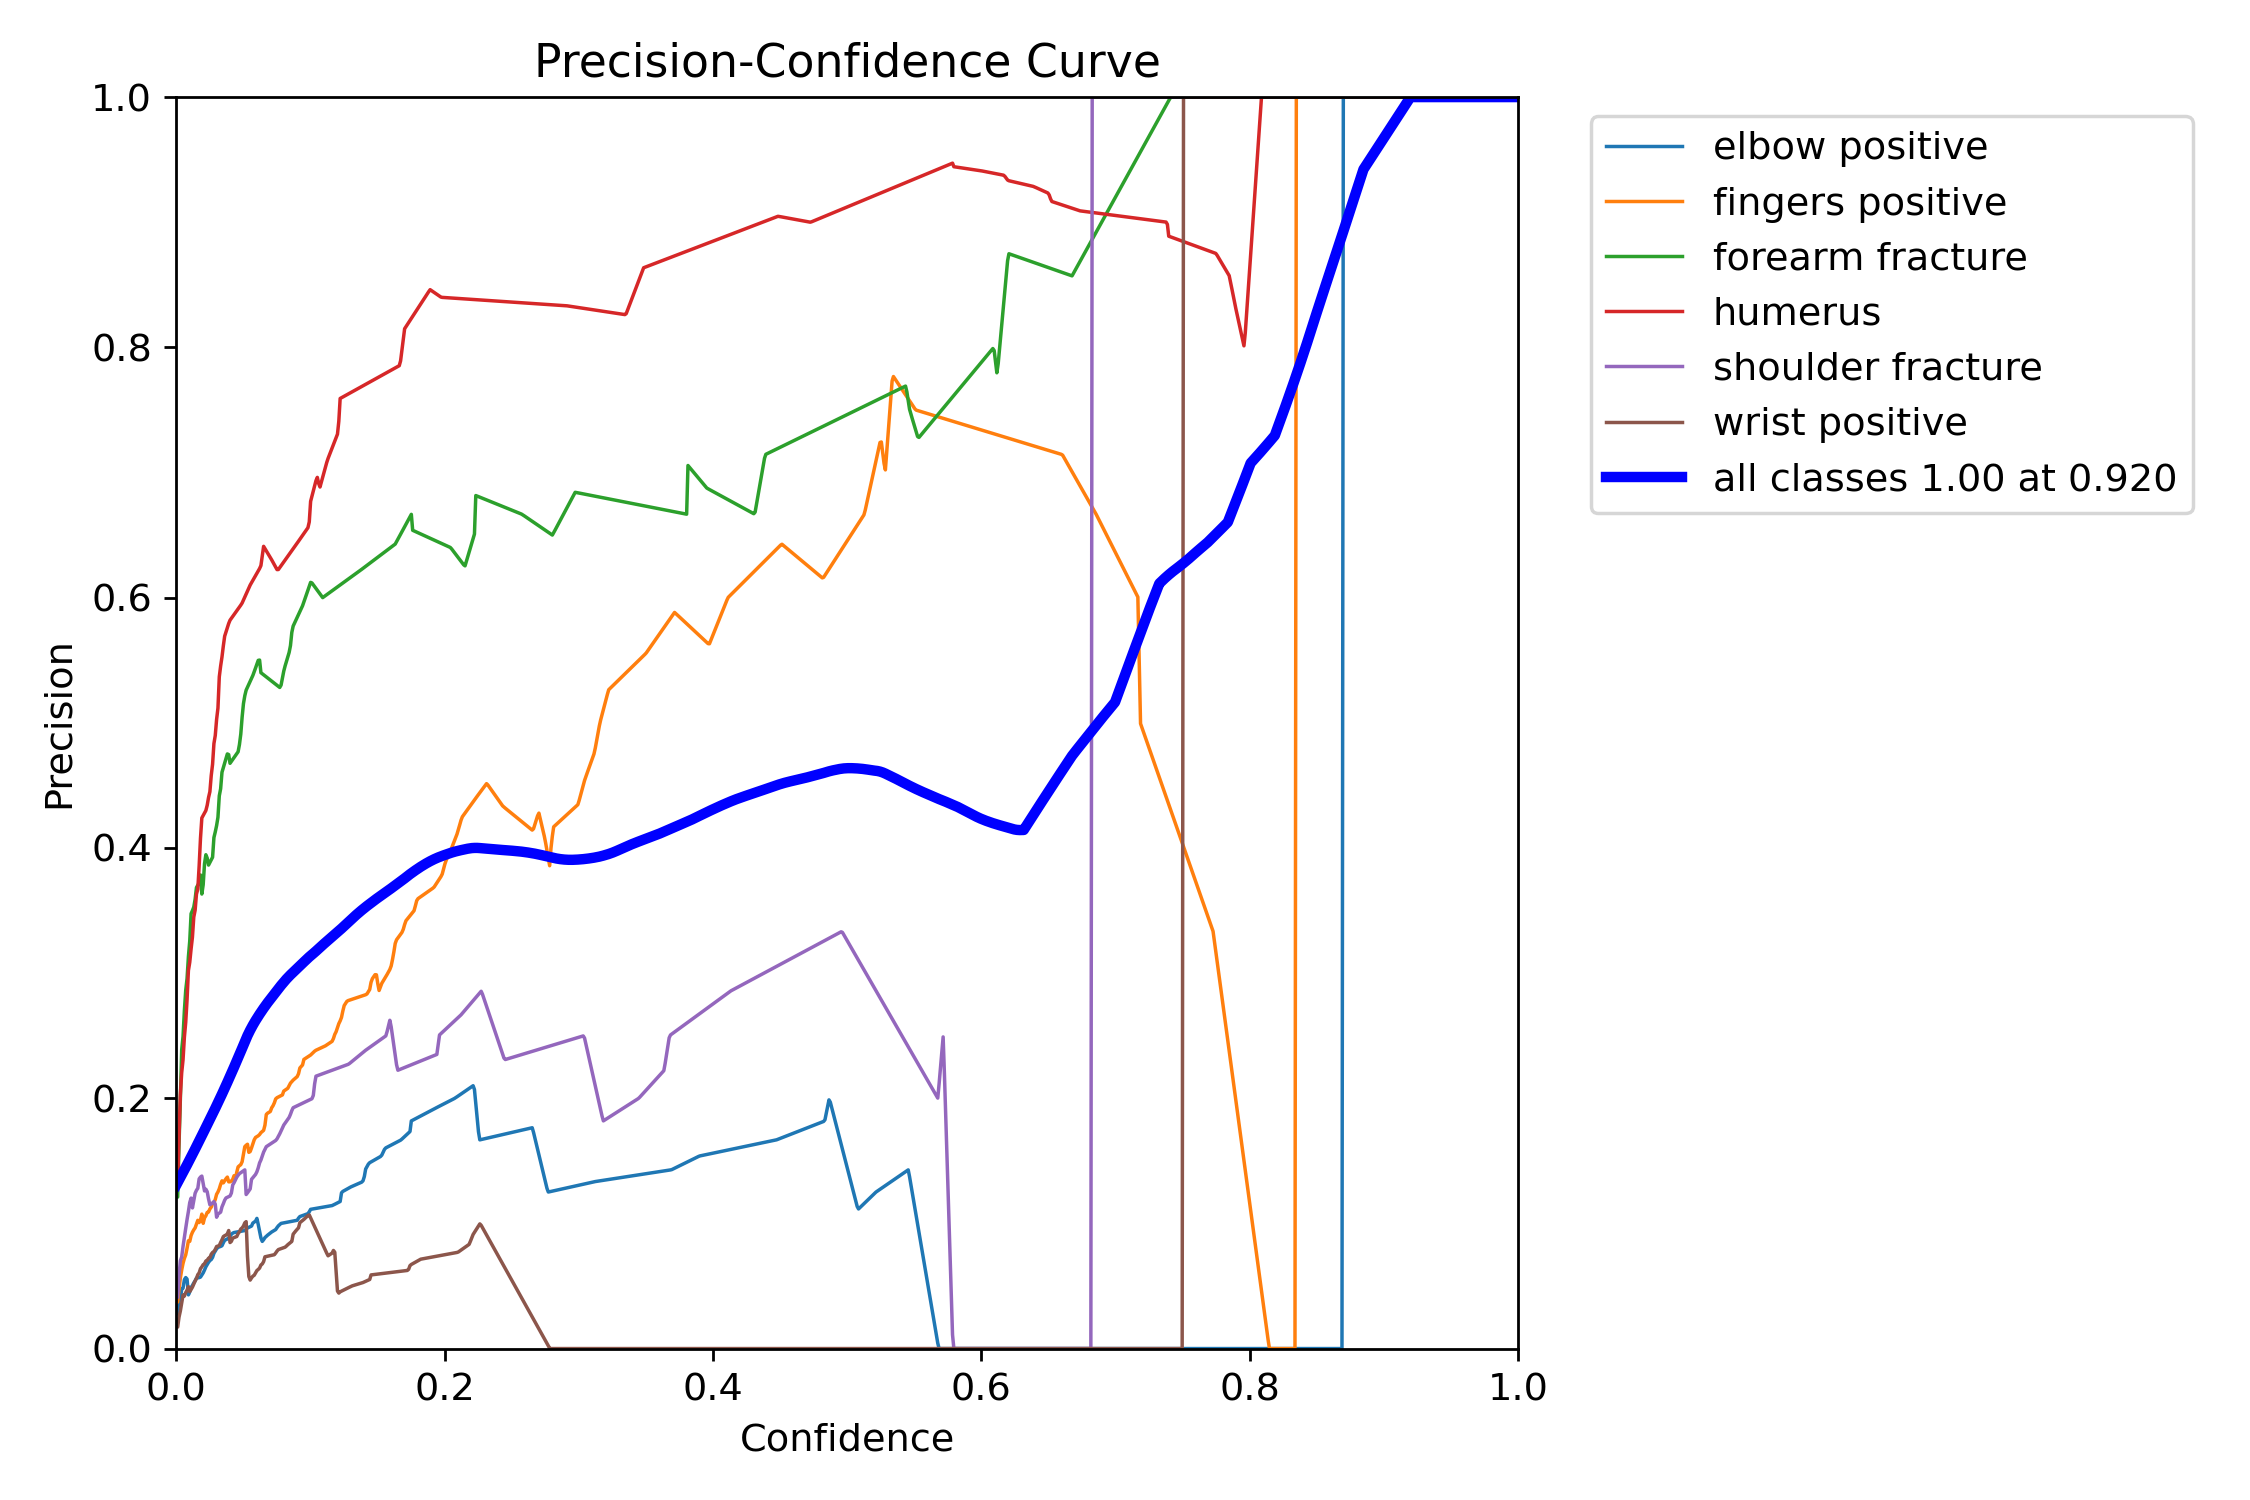

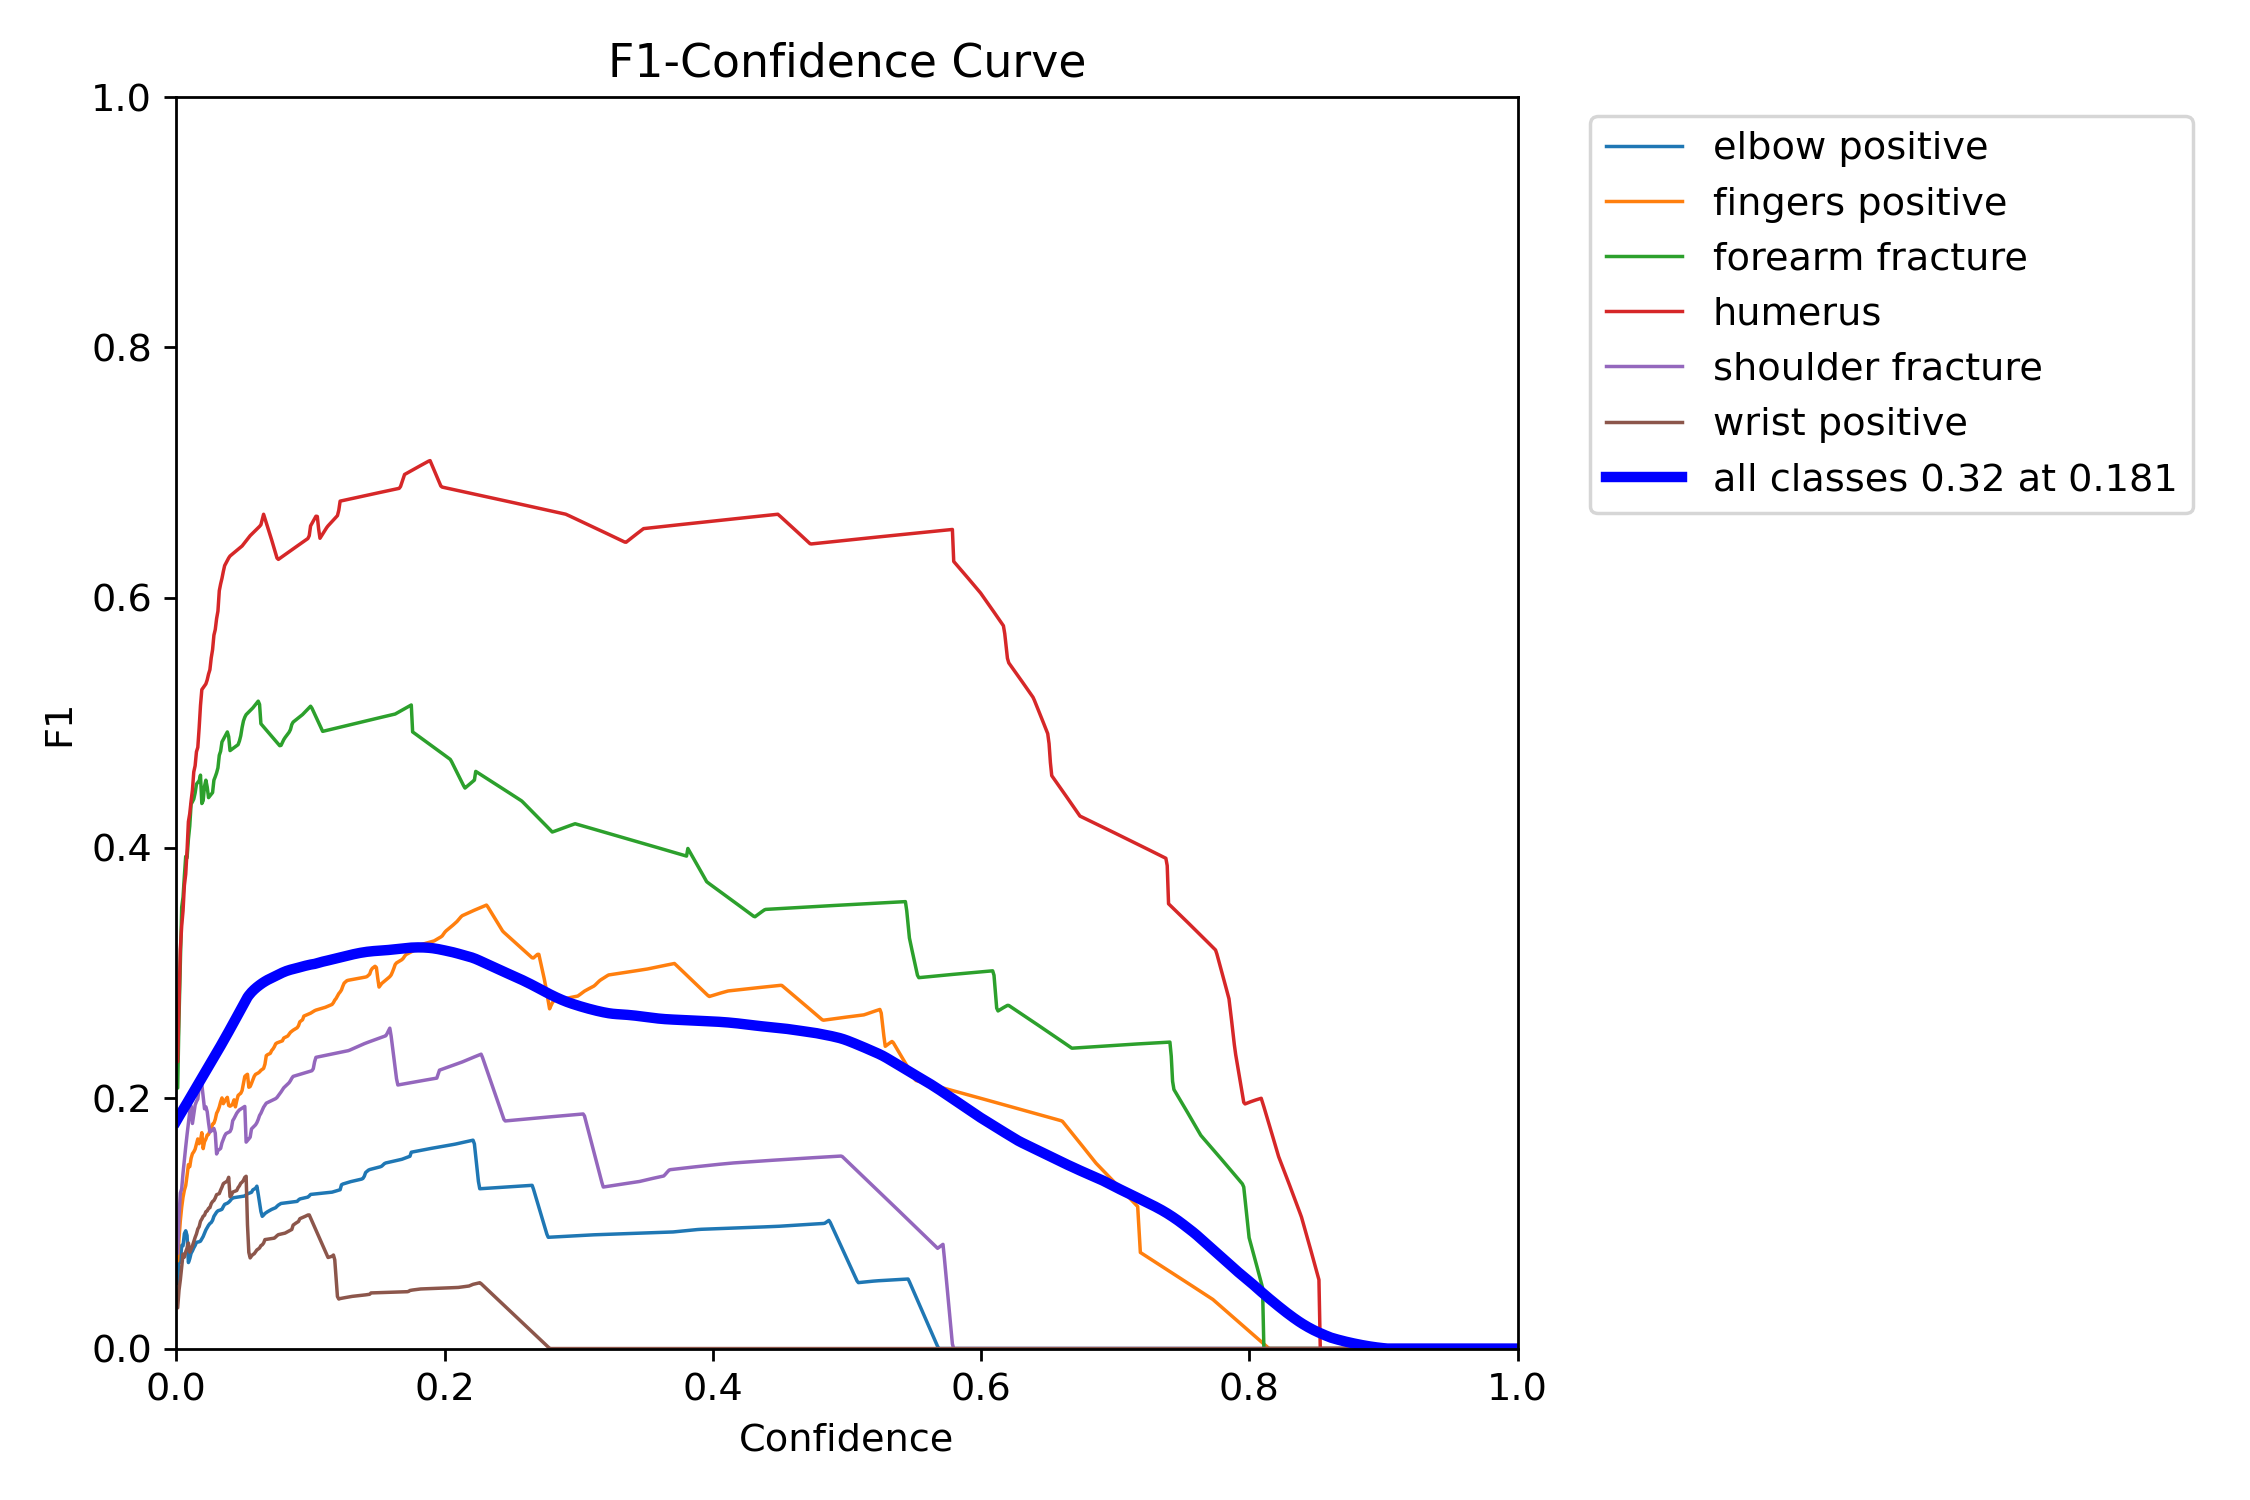

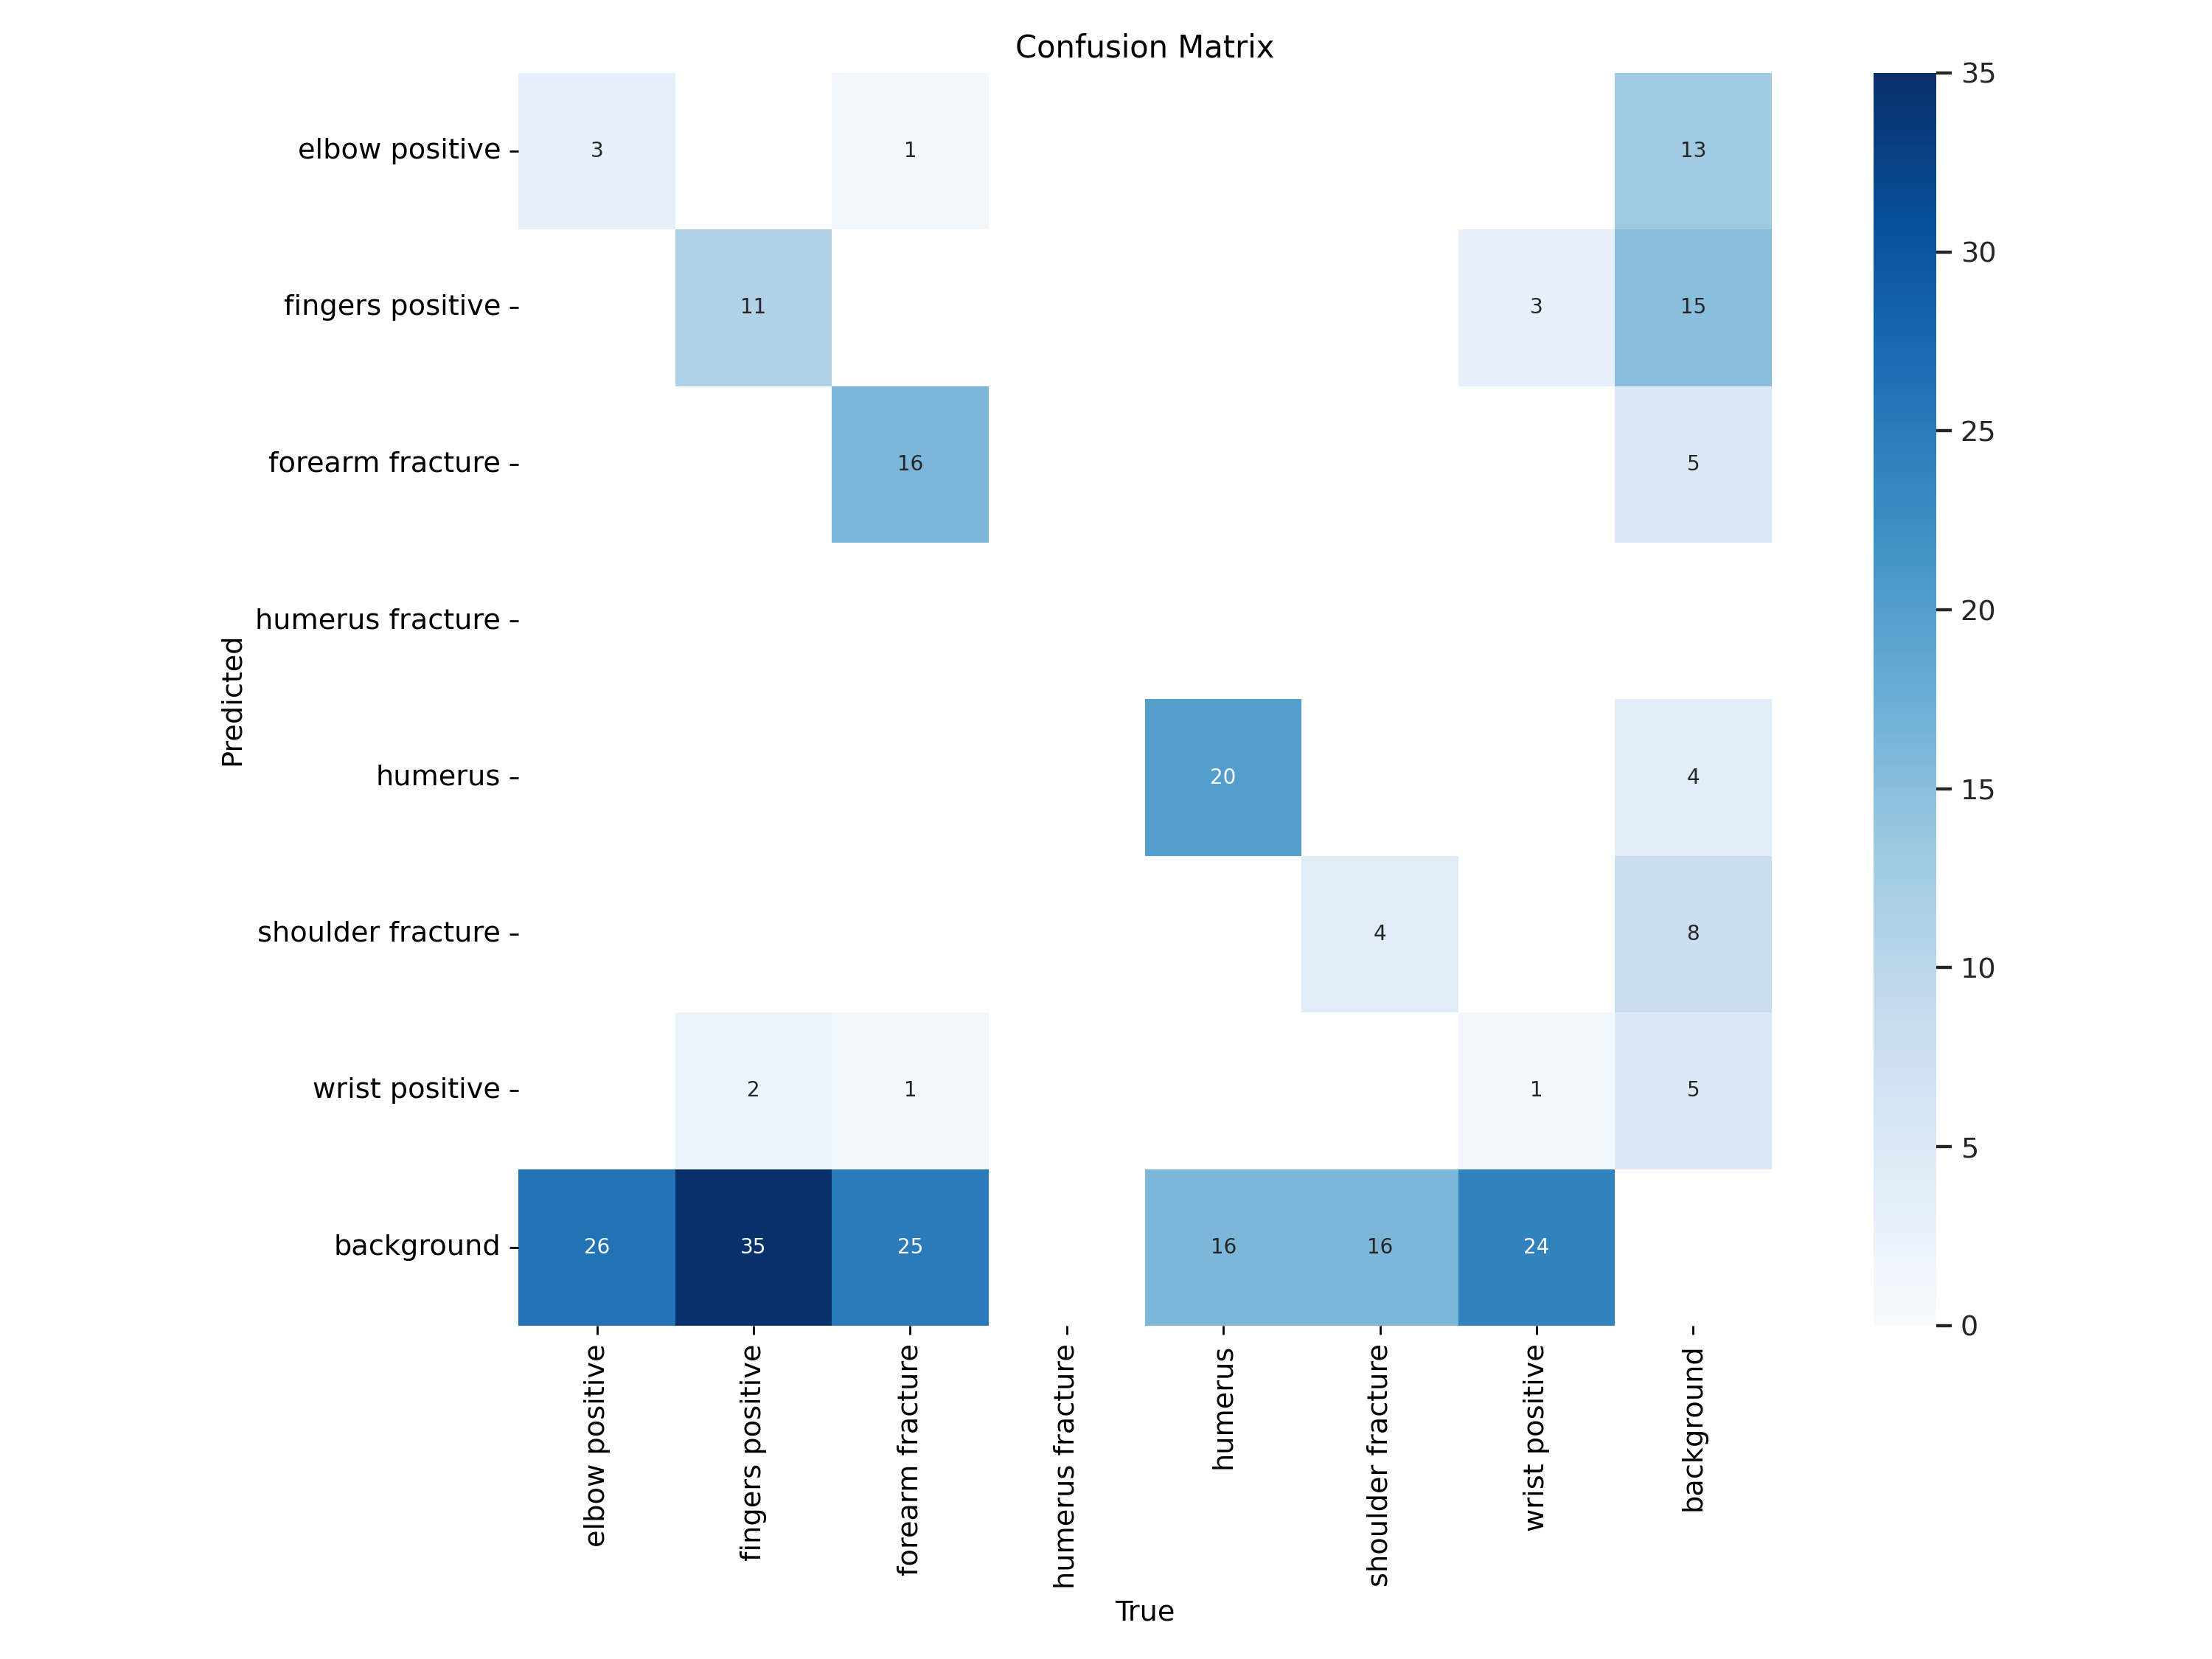

In [ ]:
# PR curve

val_res_dir= "/kaggle/working/runs/detect/val"

files= ["PR_curve.png", "R_curve.png", "P_curve.png", "F1_curve.png", "confusion_matrix.png"]

for file_name in files:
    img= cv2.imread(os.path.join(val_res_dir, file_name))
    cv2_imshow(img)

    print("\n")

# Test evaluation

In [ ]:
# cli
!yolo detect mode=predict model= /kaggle/working/runs/detect/train3/weights/best.pt source= /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/test/images conf= 0.25

Ultralytics 8.3.112 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs

image 1/169 /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/test/images/distal-humerus-fracture-1_jpg.rf.831cb137cfcbde1079f86abd5f5f2867.jpg: 640x256 1 elbow positive, 41.3ms
image 2/169 /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/test/images/image1_0_png.rf.99862308d714bff3f9c410adf5ca93ac.jpg: 480x640 (no detections), 43.3ms
image 3/169 /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/test/images/image1_1000_png.rf.a53c5e186c03961bf88075c6e3e94cf6.jpg: 544x640 (no detections), 42.5ms
image 4/169 /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/test/images/image1_1015_png.rf.3b7320c3c40771fa5532bf713a728b83.jpg: 544x640 (no detections), 15.6ms
image 5/169 /kaggle/input/bone-fracture-detection-

## See test results

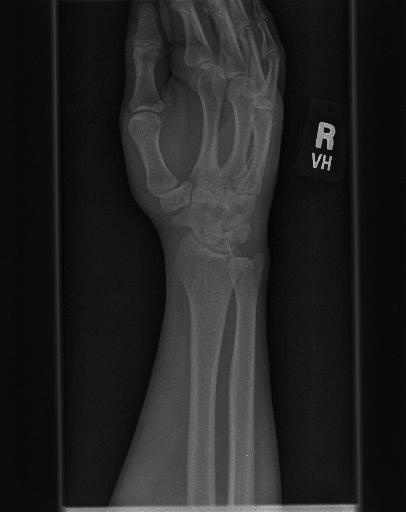

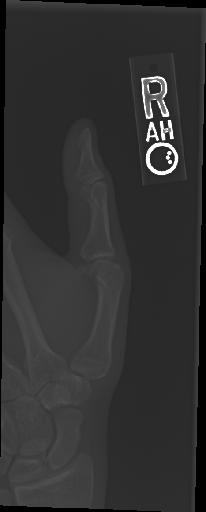

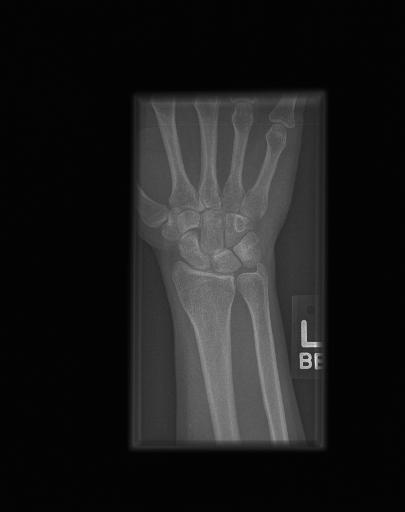

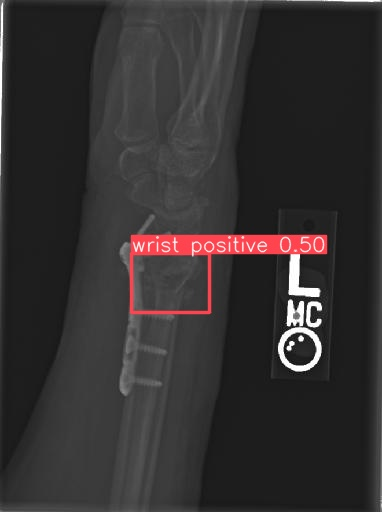

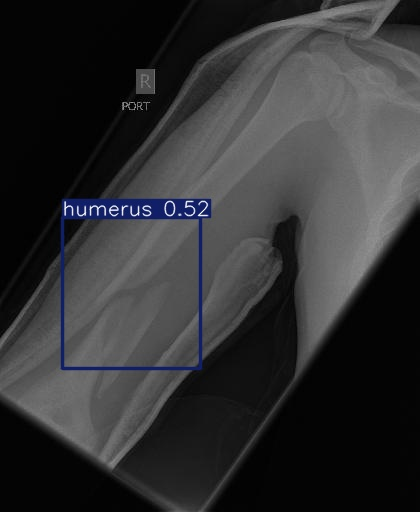

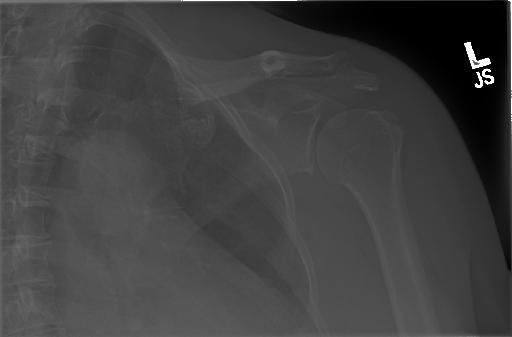

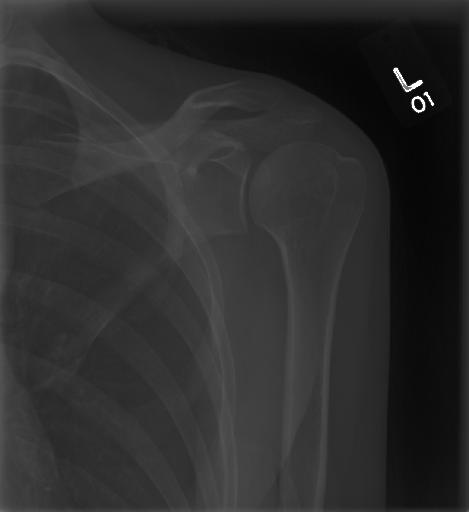

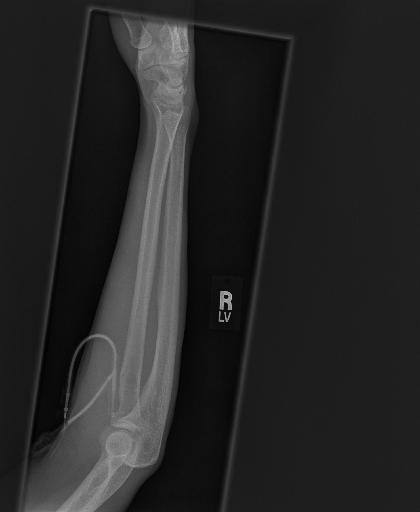

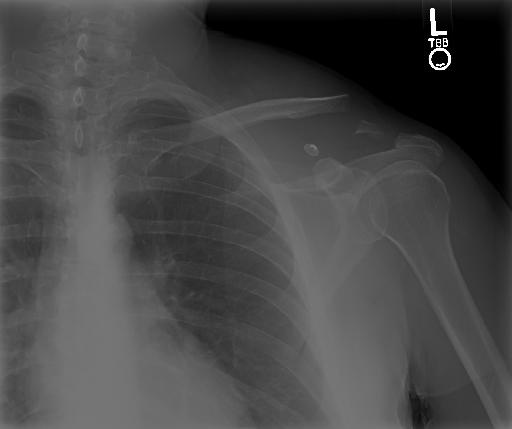

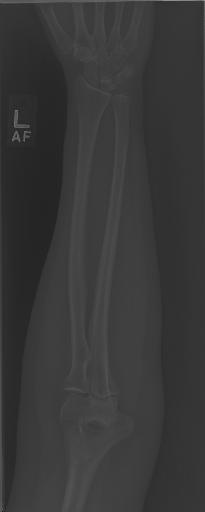

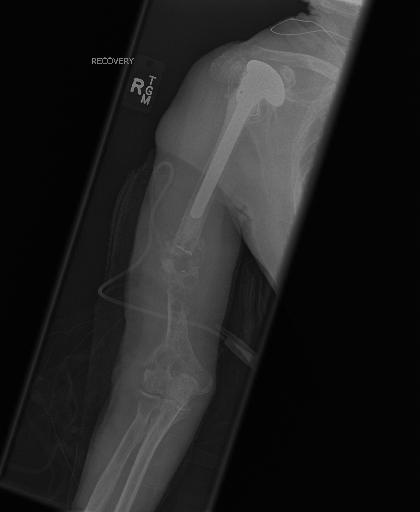

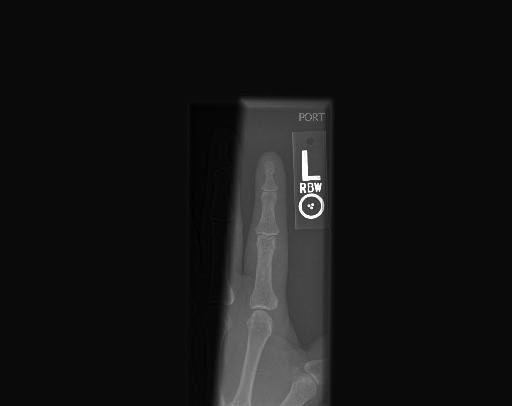

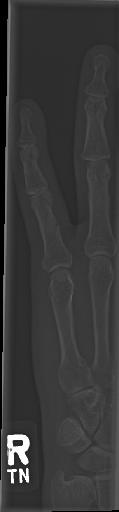

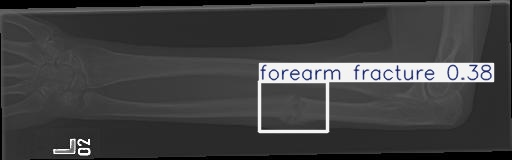

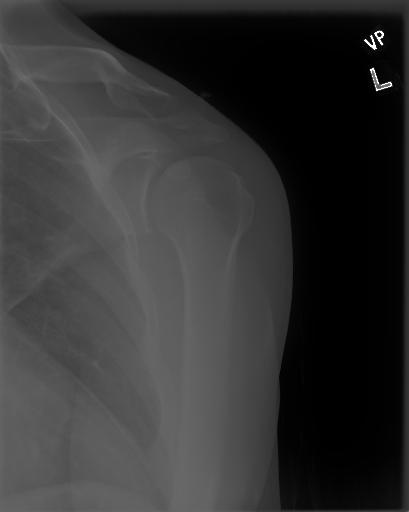

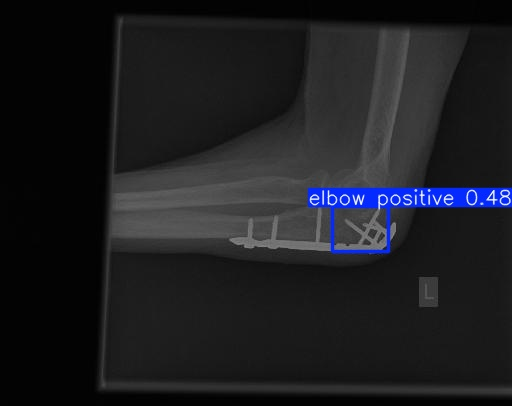

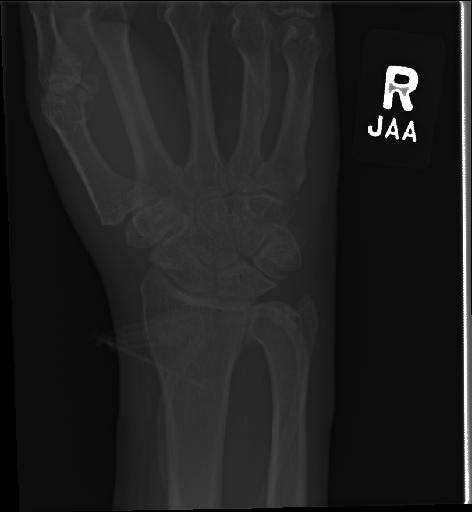

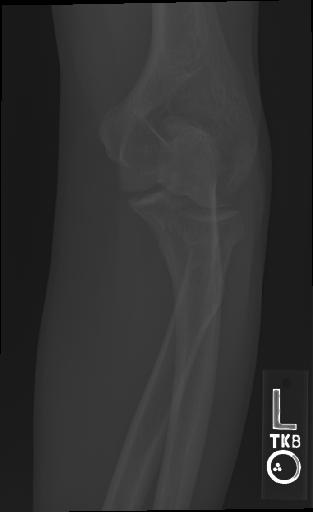

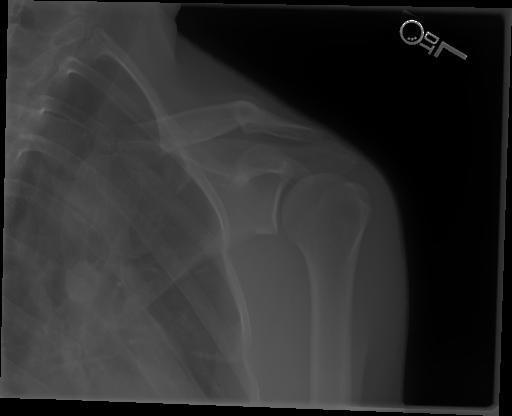

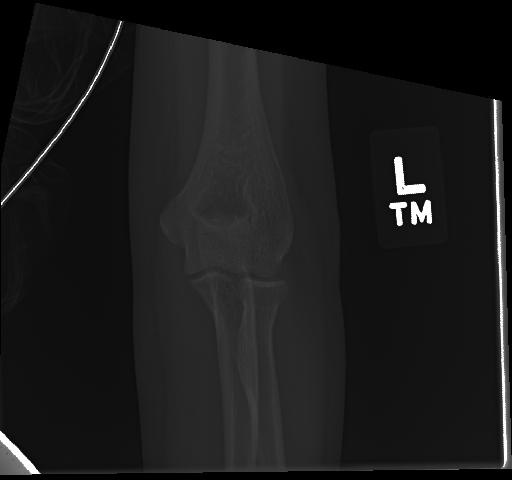

In [ ]:
preds_dir= "/kaggle/working/runs/detect/predict"


for file in os.listdir(preds_dir)[15:35]:
    img= cv2.imread(os.path.join(preds_dir, file))
    cv2_imshow(img)

    print("\n")

In [ ]:
import shutil

shutil.copy('/kaggle/working/runs/detect/train/weights/best.pt', '/kaggle/working/best_model.pt')
